In [1]:
import numpy as np
import sys
from setup.bandits import Environment
from setup.testing import Test


class Policy(object):
    def __init__(self,actions):
        self.num_actions=actions
    def act(self):
        pass
    def feedback(self,action,reward):
        pass



## Greedy

In [2]:
class Greedy(Policy):
    def __init__(self,actions,**kwargs):
        super().__init__(actions)
        self.total_counts=np.zeros(self.num_actions)
        self.name="Greedy"
        self.total_reward=np.zeros(self.num_actions)
    def act(self):
        current_track=np.divide(self.total_reward,self.total_counts,where=self.total_counts>0)
        current_track[self.total_counts==0]=0
        taken_action=np.argmax(current_track)
        return taken_action
    def feedback(self,action,reward):
        self.total_reward[action]+=reward
        self.total_counts[action]+=1


Distribution: Bernoulli
Rewards [0.44873522 0.28353771 0.62566496 0.49560654 0.33753382 0.57348535
 0.26063078 0.99474795 0.56935494 0.0912191 ]
 most optimal reward 7


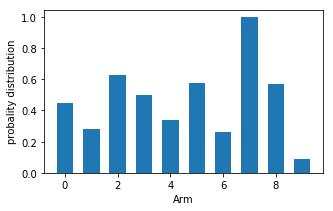

---------------------------------------------------------
Policy Greedy
 Arms pull [1000.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 max arm pull:0


/home/shashank98/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1156: UserWarning: sharex argument to subplots() was an integer. Did you intend to use subplot() (without 's')?
  "sharex argument to subplots() was an integer. "


ValueError: sharex [1] must be one of ['all', 'row', 'col', 'none']

In [3]:

num_actions=10
trials=1000
env=Environment(num_actions)
agent=Greedy(num_actions)
test=Test(env,agent)
test.run_bandit(trials)

In greedy approach we take the arm with highest expected arm reward.
r<sub>a</sub> =E[r|a]

Choose the arm having max value of r<sub>a</sub> over all the arms

But it has a disadvantage that greedy might lock down into a suboptimal arm and never comes back from it.

## Epsilon Greedy

In [ ]:
class EpsilonGreedy(Greedy):
    def __init__(self,num_actions,epsilon=0.5,**kwargs):
        super().__init__(num_actions)
        self.name="EpsilonGreedy"
        self.epsilon=epsilon
        if(epsilon > 1 or epsilon<0):
            print("Epsilon should be between 0 and 1",flush=True)
            sys.exit(0)
    def act(self):
        choice=np.random.binomial(1,self.epsilon)
        if(choice==1):
            return np.random.choice(self.num_actions)
        else:
            return super().act()
            

num_actions=10
trials=1000
env=Environment(num_actions)
agent=EpsilonGreedy(num_actions)
test=Test(env,agent)
test.run_bandit(trials)